# Addition

You can add one network to another. The network you're adding the other network too will be updated with the nodes, link and data from the other network. The process aims to consolidate node and link indexing, for nodes in the same spot and links with the same modes.

This method should only be used with networks that have been generated in the same manner, so two PT2MATSim networks or two GeNet OSM networks, both of which either simplified or not. It is recommended that they are not simplified at the time of adding, as some nodes may have ceased to exist through simplification, possibly leading to a network with weird behaviour, duplicated links (especially when the networks have different density) or connectivity issues.

For now, the method only supports non overlapping services for `Schedules`, so let's merge two `Network`s with just graphs.

In [1]:
from genet import Network

Below we make two networks from OSM. One a small, but denser subset of the other and add them together.

In [2]:
_n_tiny = Network('epsg:27700')
_n_tiny.read_osm('../example_data/tiny_example.osm', '../configs/default_config.yml')
_n_tiny

2020-12-17 17:25:27,770 - Building OSM graph from file ../example_data/tiny_example.osm
2020-12-17 17:25:27,848 - Creating networkx graph from OSM data
2020-12-17 17:25:27,849 - OSM: Extract Nodes and Paths from OSM data
2020-12-17 17:25:27,871 - OSM: Add each OSM way (aka, path) to the OSM graph
2020-12-17 17:25:29,108 - Created OSM edges
2020-12-17 17:25:30,791 - Added 810 nodes
2020-12-17 17:25:34,863 - Generated 275 link ids.
2020-12-17 17:25:34,999 - Added 275 links
2020-12-17 17:25:35,000 - Deleting isolated nodes which have no edges.
2020-12-17 17:25:35,016 - Removed 634 nodes.


<Network instance at 4705798176: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 176
Number of edges: 275
Average in degree:   1.5625
Average out degree:   1.5625 and 
schedule Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


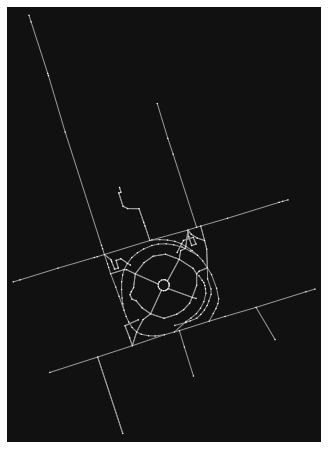

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1189c9fd0>)

In [3]:
_n_tiny.plot()

In [4]:
_n = Network('epsg:27700')
_n.read_osm('../example_data/example.osm', '../configs/slim_config.yml')
_n

2020-12-17 17:25:35,686 - Building OSM graph from file ../example_data/example.osm
2020-12-17 17:25:36,097 - Creating networkx graph from OSM data
2020-12-17 17:25:36,098 - OSM: Extract Nodes and Paths from OSM data
2020-12-17 17:25:36,303 - OSM: Add each OSM way (aka, path) to the OSM graph
2020-12-17 17:25:37,686 - Created OSM edges
2020-12-17 17:25:40,932 - Added 8695 nodes
2020-12-17 17:25:47,848 - Generated 802 link ids.
2020-12-17 17:25:48,289 - Added 802 links
2020-12-17 17:25:48,290 - Deleting isolated nodes which have no edges.
2020-12-17 17:25:48,487 - Removed 8132 nodes.


<Network instance at 4705797120: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 563
Number of edges: 802
Average in degree:   1.4245
Average out degree:   1.4245 and 
schedule Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


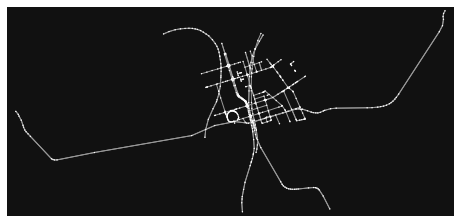

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b945ee0>)

In [5]:
_n.plot()

The `add` method actually adds one `Network` onto another, rather than create a new instance to save some memory. The `Network` being added will inherit or change link or node ids depending on the `Network` it's being added to.

In [6]:
_n.add(_n_tiny)

2020-12-17 17:25:48,851 - Generated node id 7195968685.
2020-12-17 17:25:48,861 - Changed Link attributes for 2 links
2020-12-17 17:25:48,869 - Changed Link attributes for 2 links
2020-12-17 17:25:48,892 - Changed Node attributes under index: 1684410096
2020-12-17 17:25:48,897 - Changed Node index from 1684410096 to 7195968685
2020-12-17 17:25:48,902 - Generated node id 7195968686.
2020-12-17 17:25:48,910 - Changed Link attributes for 1 links
2020-12-17 17:25:48,916 - Changed Link attributes for 0 links
2020-12-17 17:25:48,928 - Changed Node attributes under index: 101998
2020-12-17 17:25:48,932 - Changed Node index from 101998 to 7195968686
/Users/kasia.kozlowska/PycharmProjects/ABM/genet/genet/utils/graph_operations.py:320: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for idx in s2_id_df.dropna()[s2_id_df['right'] != s2_id_df['left']].index]
2020-12-17 17:25:48,940 - Finished consolidating node indexing between the two graphs
2020-12-17 17:25:56,647 -

2020-12-17 17:25:58,092 - Generated link id 834.
2020-12-17 17:25:58,108 - Changed Link attributes under index: 205
2020-12-17 17:25:58,108 - Changed Link index from 205 to 834
2020-12-17 17:25:58,115 - Generated 1 link ids.
2020-12-17 17:25:58,119 - Generated link id 835.
2020-12-17 17:25:58,132 - Changed Link attributes under index: 139
2020-12-17 17:25:58,133 - Changed Link index from 139 to 835
2020-12-17 17:25:58,139 - Generated 1 link ids.
2020-12-17 17:25:58,140 - Generated link id 836.
2020-12-17 17:25:58,166 - Changed Link attributes under index: 221
2020-12-17 17:25:58,167 - Changed Link index from 221 to 836
2020-12-17 17:25:58,173 - Generated 1 link ids.
2020-12-17 17:25:58,174 - Generated link id 837.
2020-12-17 17:25:58,186 - Changed Link attributes under index: 172
2020-12-17 17:25:58,186 - Changed Link index from 172 to 837
2020-12-17 17:25:58,190 - Generated 1 link ids.
2020-12-17 17:25:58,191 - Generated link id 838.
2020-12-17 17:25:58,205 - Changed Link attributes u

2020-12-17 17:25:58,770 - Generated 1 link ids.
2020-12-17 17:25:58,771 - Generated link id 871.
2020-12-17 17:25:58,781 - Changed Link attributes under index: 96
2020-12-17 17:25:58,782 - Changed Link index from 96 to 871
2020-12-17 17:25:58,787 - Generated 1 link ids.
2020-12-17 17:25:58,787 - Generated link id 872.
2020-12-17 17:25:58,796 - Changed Link attributes under index: 120
2020-12-17 17:25:58,797 - Changed Link index from 120 to 872
2020-12-17 17:25:58,803 - Generated 1 link ids.
2020-12-17 17:25:58,804 - Generated link id 873.
2020-12-17 17:25:58,813 - Changed Link attributes under index: 217
2020-12-17 17:25:58,815 - Changed Link index from 217 to 873
2020-12-17 17:25:58,820 - Generated 1 link ids.
2020-12-17 17:25:58,821 - Generated link id 874.
2020-12-17 17:25:58,829 - Changed Link attributes under index: 156
2020-12-17 17:25:58,829 - Changed Link index from 156 to 874
2020-12-17 17:25:58,834 - Generated 1 link ids.
2020-12-17 17:25:58,834 - Generated link id 875.
2020-

2020-12-17 17:25:59,405 - Changed Link index from 202 to 907
2020-12-17 17:25:59,409 - Generated 1 link ids.
2020-12-17 17:25:59,410 - Generated link id 908.
2020-12-17 17:25:59,423 - Changed Link attributes under index: 32
2020-12-17 17:25:59,423 - Changed Link index from 32 to 908
2020-12-17 17:25:59,426 - Generated 1 link ids.
2020-12-17 17:25:59,427 - Generated link id 909.
2020-12-17 17:25:59,438 - Changed Link attributes under index: 40
2020-12-17 17:25:59,439 - Changed Link index from 40 to 909
2020-12-17 17:25:59,441 - Generated 1 link ids.
2020-12-17 17:25:59,442 - Generated link id 910.
2020-12-17 17:25:59,454 - Changed Link attributes under index: 87
2020-12-17 17:25:59,455 - Changed Link index from 87 to 910
2020-12-17 17:25:59,458 - Generated 1 link ids.
2020-12-17 17:25:59,459 - Generated link id 911.
2020-12-17 17:25:59,472 - Changed Link attributes under index: 106
2020-12-17 17:25:59,472 - Changed Link index from 106 to 911
2020-12-17 17:25:59,476 - Generated 1 link id

2020-12-17 17:26:00,308 - Changed Link attributes under index: 42
2020-12-17 17:26:00,309 - Changed Link index from 42 to 944
2020-12-17 17:26:00,312 - Generated 1 link ids.
2020-12-17 17:26:00,313 - Generated link id 945.
2020-12-17 17:26:00,324 - Changed Link attributes under index: 183
2020-12-17 17:26:00,325 - Changed Link index from 183 to 945
2020-12-17 17:26:00,329 - Generated 1 link ids.
2020-12-17 17:26:00,330 - Generated link id 946.
2020-12-17 17:26:00,341 - Changed Link attributes under index: 140
2020-12-17 17:26:00,342 - Changed Link index from 140 to 946
2020-12-17 17:26:00,345 - Generated 1 link ids.
2020-12-17 17:26:00,346 - Generated link id 947.
2020-12-17 17:26:00,361 - Changed Link attributes under index: 266
2020-12-17 17:26:00,362 - Changed Link index from 266 to 947
2020-12-17 17:26:00,367 - Generated 1 link ids.
2020-12-17 17:26:00,370 - Generated link id 948.
2020-12-17 17:26:00,379 - Changed Link attributes under index: 16
2020-12-17 17:26:00,380 - Changed Li

2020-12-17 17:26:00,941 - Generated link id 981.
2020-12-17 17:26:00,956 - Changed Link attributes under index: 24
2020-12-17 17:26:00,957 - Changed Link index from 24 to 981
2020-12-17 17:26:00,960 - Generated 1 link ids.
2020-12-17 17:26:00,961 - Generated link id 982.
2020-12-17 17:26:00,975 - Changed Link attributes under index: 189
2020-12-17 17:26:00,976 - Changed Link index from 189 to 982
2020-12-17 17:26:00,980 - Generated 1 link ids.
2020-12-17 17:26:00,986 - Generated link id 983.
2020-12-17 17:26:00,994 - Changed Link attributes under index: 247
2020-12-17 17:26:00,995 - Changed Link index from 247 to 983
2020-12-17 17:26:01,000 - Generated 1 link ids.
2020-12-17 17:26:01,002 - Generated link id 984.
2020-12-17 17:26:01,011 - Changed Link attributes under index: 3
2020-12-17 17:26:01,012 - Changed Link index from 3 to 984
2020-12-17 17:26:01,017 - Generated 1 link ids.
2020-12-17 17:26:01,019 - Generated link id 985.
2020-12-17 17:26:01,028 - Changed Link attributes under i

In [7]:
_n

<Network instance at 4705797120: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 665
Number of edges: 1003
Average in degree:   1.5083
Average out degree:   1.5083 and 
schedule Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


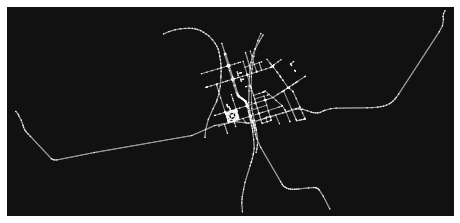

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1189c9520>)

In [8]:
_n.plot()